# Proyecto Final – Predicción del ROAS (Retorno sobre la inversión en publicidad) de una Empresa del sector belleza de Latinoamérica

Integrantes del grupo:
- OSCAR EDUARDO AVILA BERNAL
- OSCAR IVAN BAUTISTA SANTANA
- JORGE ALEJANDRO HURTADO RAMIREZ
- JOSE DARIO NAVAS TORRES
- JUAN DAVID ORTEGA MURCIA
- NICOLAS ESTEBAN ROMERO VARGAS

Descripción del problema:

El propósito de este ejercicio es la predicción del retorno sobre la inversión en publicidad (**ROAS**) de una Empresa del sector belleza de Latinoamérica enfocados en Colombia. Para ello, utilizaremos datos obtenidos de un entorno cercano (actividad laboral). Contamos con un conjunto de 13.939 registros, los cuales proporcionan información diaria por campaña de publicidad.
Entre las variables principales que serán consideradas para el análisis, destacan:

 - session_source: Indica la fuente de la sesión, con valores como Google Ads, Meta, TikTok, entre otros.
 - channel: Describe el canal de publicidad utilizado, como Pmax, Search, Social, Video, Discovery, Display, App, Shopping, Demand-Gen, YouTube.
 - campaign: Especifica la campaña de publicidad en la que se enmarca la actividad, incluyendo categorías como Always On, E-Commerce, Buenfin, Liveshopping, Navidad, Hotsale.
 - cost: Costo asociado a la campaña.
 - impressions: Número de visualizaciones obtenidas.
 - clicks: Cantidad de clics generados.
 - revenue_GA4: Ingresos generados en la página.
 - transactions_GA4: Transacciones realizadas.
 - ROAS_GA4: Retorno sobre la inversión en publicidad.
    (Return on Ad Spend in Google Analytics 4) es una métrica que mide la efectividad de una campaña publicitaria en términos de ingresos generados en comparación con el gasto en publicidad. Es una proporción que indica cuánto dinero se gana por cada unidad monetaria gastada en publicidad. 

Para guiar nuestro trabajo, seguiremos la metodología CRISP-DM (Cross-Industry Standard Process for Data Mining). Comenzaremos por el entendimiento del negocio y de los datos, lo cual implicará reuniones con la fuente de los datos para comprender a fondo el contexto y los objetivos del proyecto.

Es importante destacar que disponemos de información recopilada desde noviembre de 2023 hasta abril de 2024, lo que nos permitirá realizar un análisis histórico significativo y construir modelos predictivos robustos.



## Librerias

In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, BayesianRidge, HuberRegressor, SGDRegressor, LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

## Cargar los datos
Se carga la base datos "media_data.xlsx" y se guarda como un DataSet de Pandas y se realiza un primer vistazo a los datos y su información

In [291]:
df = pd.read_excel("media_data.xlsx")
df.head()

,Date,session_source,channel,full_campaign_name,campaign,cost,impressions,clicks,video_100_platform,revenue_GA4,sessions_GA4,transactions_GA4,ROAS_GA4
0,2023-11-01,google ads,Pmax,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,142.627381,117505,2991,0.0,2411.515230,2330.0,53.0,16.907800
1,2023-11-01,google ads,Pmax,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,113.861826,25326,725,0.0,10112.215398,2890.0,122.0,88.811288
2,2023-11-01,google ads,Search,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,26.100671,1919,1084,0.0,343.408085,770.0,7.0,13.157059
3,2023-11-01,google ads,Search,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,47.238423,2818,241,0.0,71.241820,217.0,2.0,1.508133
4,2023-11-01,google ads,Search,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On,87.349721,9496,729,0.0,273.563777,564.0,3.0,3.131822


## Exploración de datos

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13939 entries, 0 to 13938
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                13939 non-null  datetime64[ns]
 1   session_source      13939 non-null  object        
 2   channel             13939 non-null  object        
 3   full_campaign_name  13939 non-null  object        
 4   campaign            13939 non-null  object        
 5   cost                13939 non-null  float64       
 6   impressions         13939 non-null  int64         
 7   clicks              13939 non-null  int64         
 8   video_100_platform  13749 non-null  float64       
 9   revenue_GA4         9258 non-null   float64       
 10  sessions_GA4        9258 non-null   float64       
 11  transactions_GA4    9258 non-null   float64       
 12  ROAS_GA4            9258 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), ob

In [293]:
df.describe()

,Date,cost,impressions,clicks,video_100_platform,revenue_GA4,sessions_GA4,transactions_GA4,ROAS_GA4
count,13939,13939.000000,1.393900e+04,13939.000000,1.374900e+04,9258.000000,9258.000000,9258.000000,9258.000000
mean,2024-01-29 10:12:18.130425344,122.658396,6.600242e+04,1108.134299,9.391531e+03,502.298718,724.051199,10.751458,35.974596
min,2023-11-01 00:00:00,0.000022,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2023-12-14 00:00:00,17.917321,3.545000e+03,137.000000,0.000000e+00,0.000000,85.000000,0.000000,0.000000
50%,2024-01-28 00:00:00,49.147681,2.011800e+04,423.000000,0.000000e+00,57.688403,302.000000,2.000000,0.840791
75%,2024-03-15 00:00:00,130.647541,7.181400e+04,1326.000000,3.640000e+02,398.260112,944.000000,9.000000,3.592142
max,2024-04-30 00:00:00,8508.438020,3.043055e+06,55830.000000,1.691855e+06,46453.106163,17922.000000,680.000000,247021.915106
std,NaN,267.375938,1.313682e+05,2287.547793,4.518946e+04,1456.234115,1076.106026,26.985925,2575.822413


In [294]:
df.describe(include=object)

,session_source,channel,full_campaign_name,campaign
count,13939,13939,13939,13939
unique,3,10,177,6
top,google ads,Social,Agencia-2023_LATAM_Cliente_LATAMformance_Alway...,Always On
freq,8784,5125,364,12574


### Resumen_1

El conjunto de datos consta de 13 variables: 4 categóricas, 1 en formato de fecha y las restantes numéricas. Observamos que en la variable objetivo y en otras 4 variables hay 9,258 datos no nulos de los 13,749 registros totales, ademas en las variables numéricas se observa una gran diferencia entre el valor máximo y la media, lo que sugiere la presencia de datos atípicos. Para abordar esto, se procede a realizar una visualización de datos que permitirá identificar y limpiar estos valores atípicos.

Además, se identificaron 3 tipos de session_source, 10 tipos de channel y 6 tipos de campaigns. Se analizó la moda y la frecuencia respectiva de cada una de estas categorías para obtener una mejor comprensión de su distribución en el conjunto de datos.

## Limpieza de datos

In [295]:
df_NonNull = df.dropna(subset=['ROAS_GA4'])
df_NonNull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9258 entries, 0 to 13935
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                9258 non-null   datetime64[ns]
 1   session_source      9258 non-null   object        
 2   channel             9258 non-null   object        
 3   full_campaign_name  9258 non-null   object        
 4   campaign            9258 non-null   object        
 5   cost                9258 non-null   float64       
 6   impressions         9258 non-null   int64         
 7   clicks              9258 non-null   int64         
 8   video_100_platform  9258 non-null   float64       
 9   revenue_GA4         9258 non-null   float64       
 10  sessions_GA4        9258 non-null   float64       
 11  transactions_GA4    9258 non-null   float64       
 12  ROAS_GA4            9258 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4

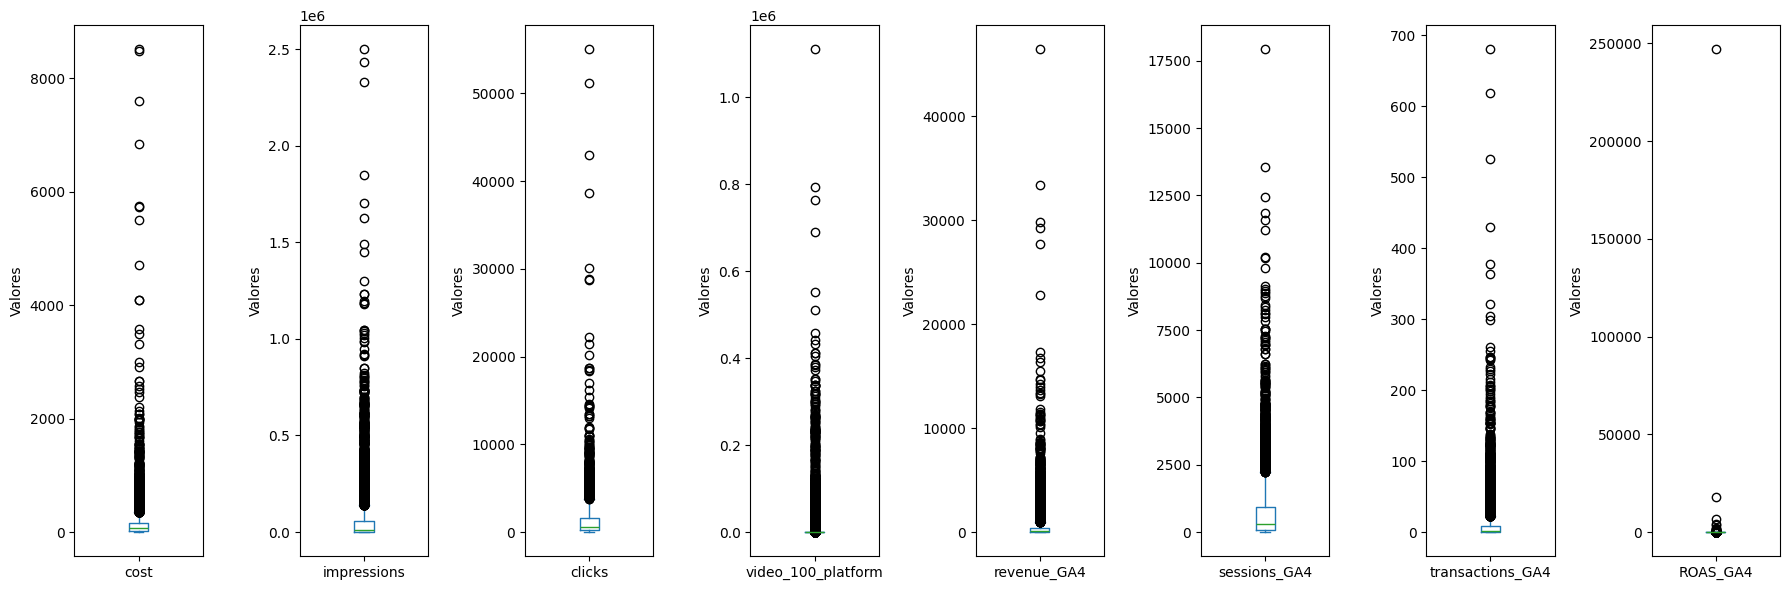

In [296]:
numeric_vars = df_NonNull.select_dtypes(include=['int64', 'float64'])
fig, axs = plt.subplots(nrows=1, ncols=len(numeric_vars.columns), figsize=(18, 6))
for i, column in enumerate(numeric_vars.columns):
    numeric_vars[column].plot(kind='box', ax=axs[i], fontsize=10)
    axs[i].set_ylabel('Valores', fontsize=10)
plt.tight_layout()  
plt.show()

In [297]:
df_NonNull = df_NonNull[df_NonNull["ROAS_GA4"] <= 500]
df_NonNull = df_NonNull.drop(['Date', 'full_campaign_name'], axis=1)
df_NonNull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9247 entries, 0 to 13935
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   session_source      9247 non-null   object 
 1   channel             9247 non-null   object 
 2   campaign            9247 non-null   object 
 3   cost                9247 non-null   float64
 4   impressions         9247 non-null   int64  
 5   clicks              9247 non-null   int64  
 6   video_100_platform  9247 non-null   float64
 7   revenue_GA4         9247 non-null   float64
 8   sessions_GA4        9247 non-null   float64
 9   transactions_GA4    9247 non-null   float64
 10  ROAS_GA4            9247 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 866.9+ KB


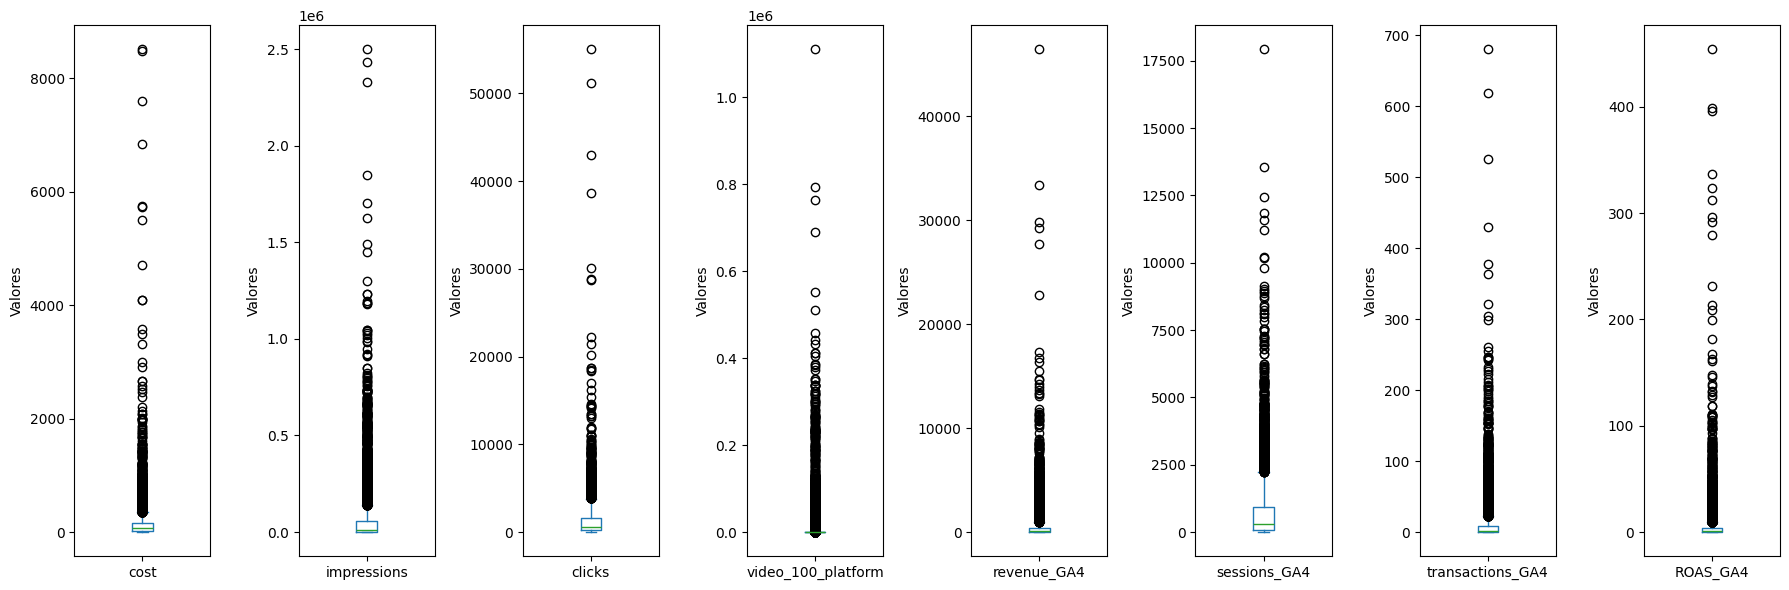

In [298]:
numeric_vars = df_NonNull.select_dtypes(include=['int64', 'float64'])
fig, axs = plt.subplots(nrows=1, ncols=len(numeric_vars.columns), figsize=(18, 6))
for i, column in enumerate(numeric_vars.columns):
    numeric_vars[column].plot(kind='box', ax=axs[i], fontsize=10)
    axs[i].set_ylabel('Valores', fontsize=10)
plt.tight_layout()  
plt.show()

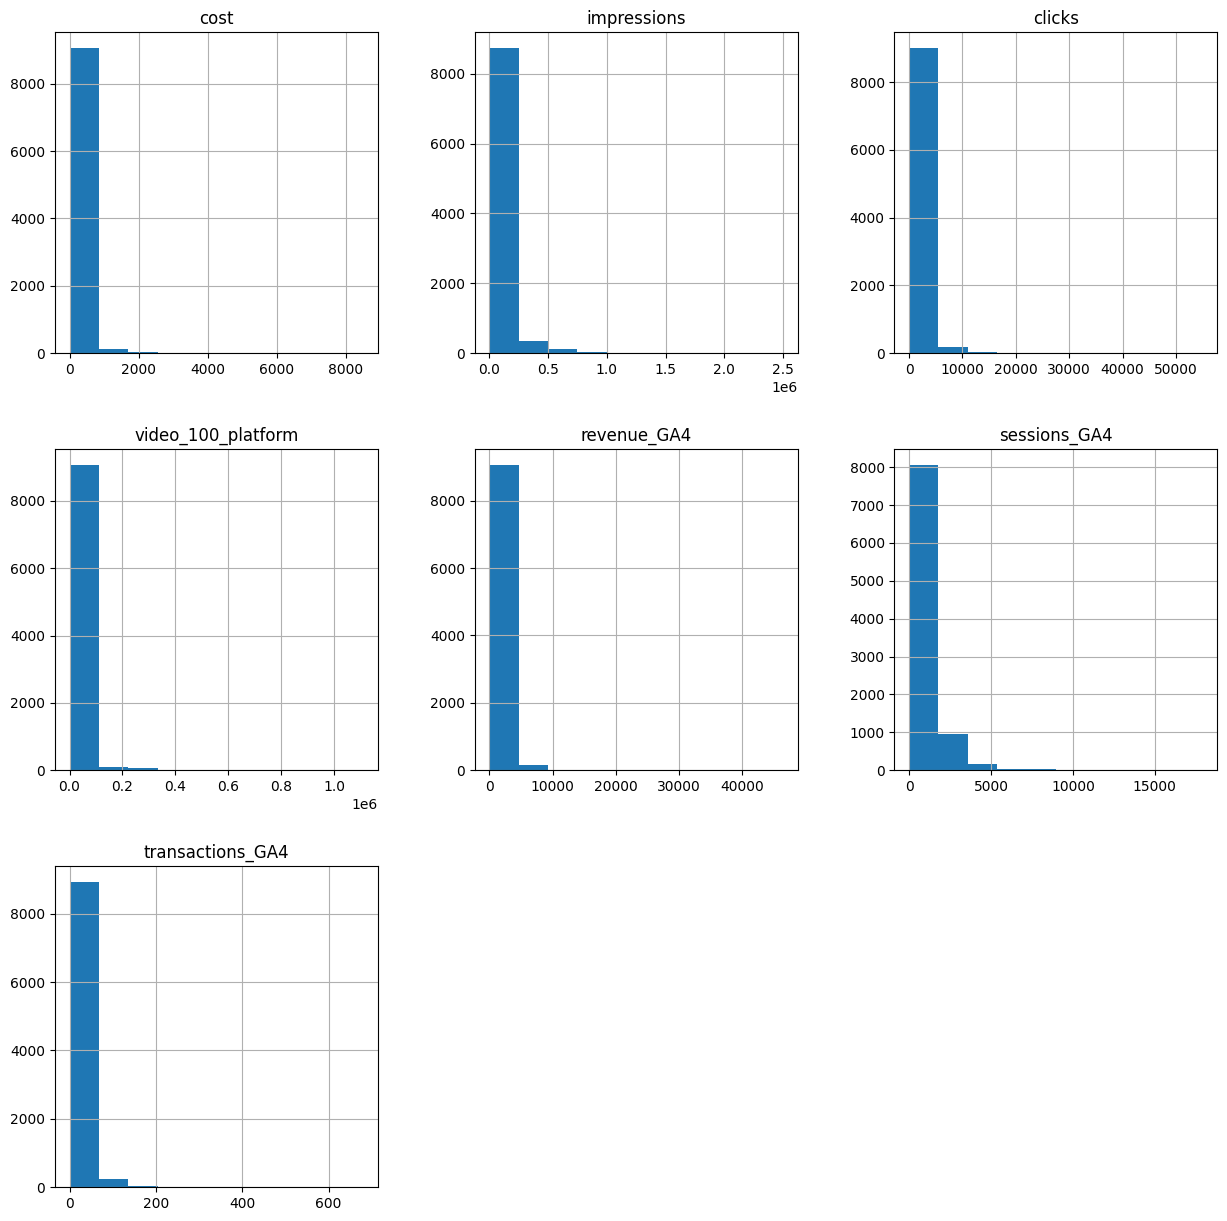

In [299]:
df_NonNull.drop(["ROAS_GA4"], axis=1).hist(figsize=(15, 15))
plt.show()


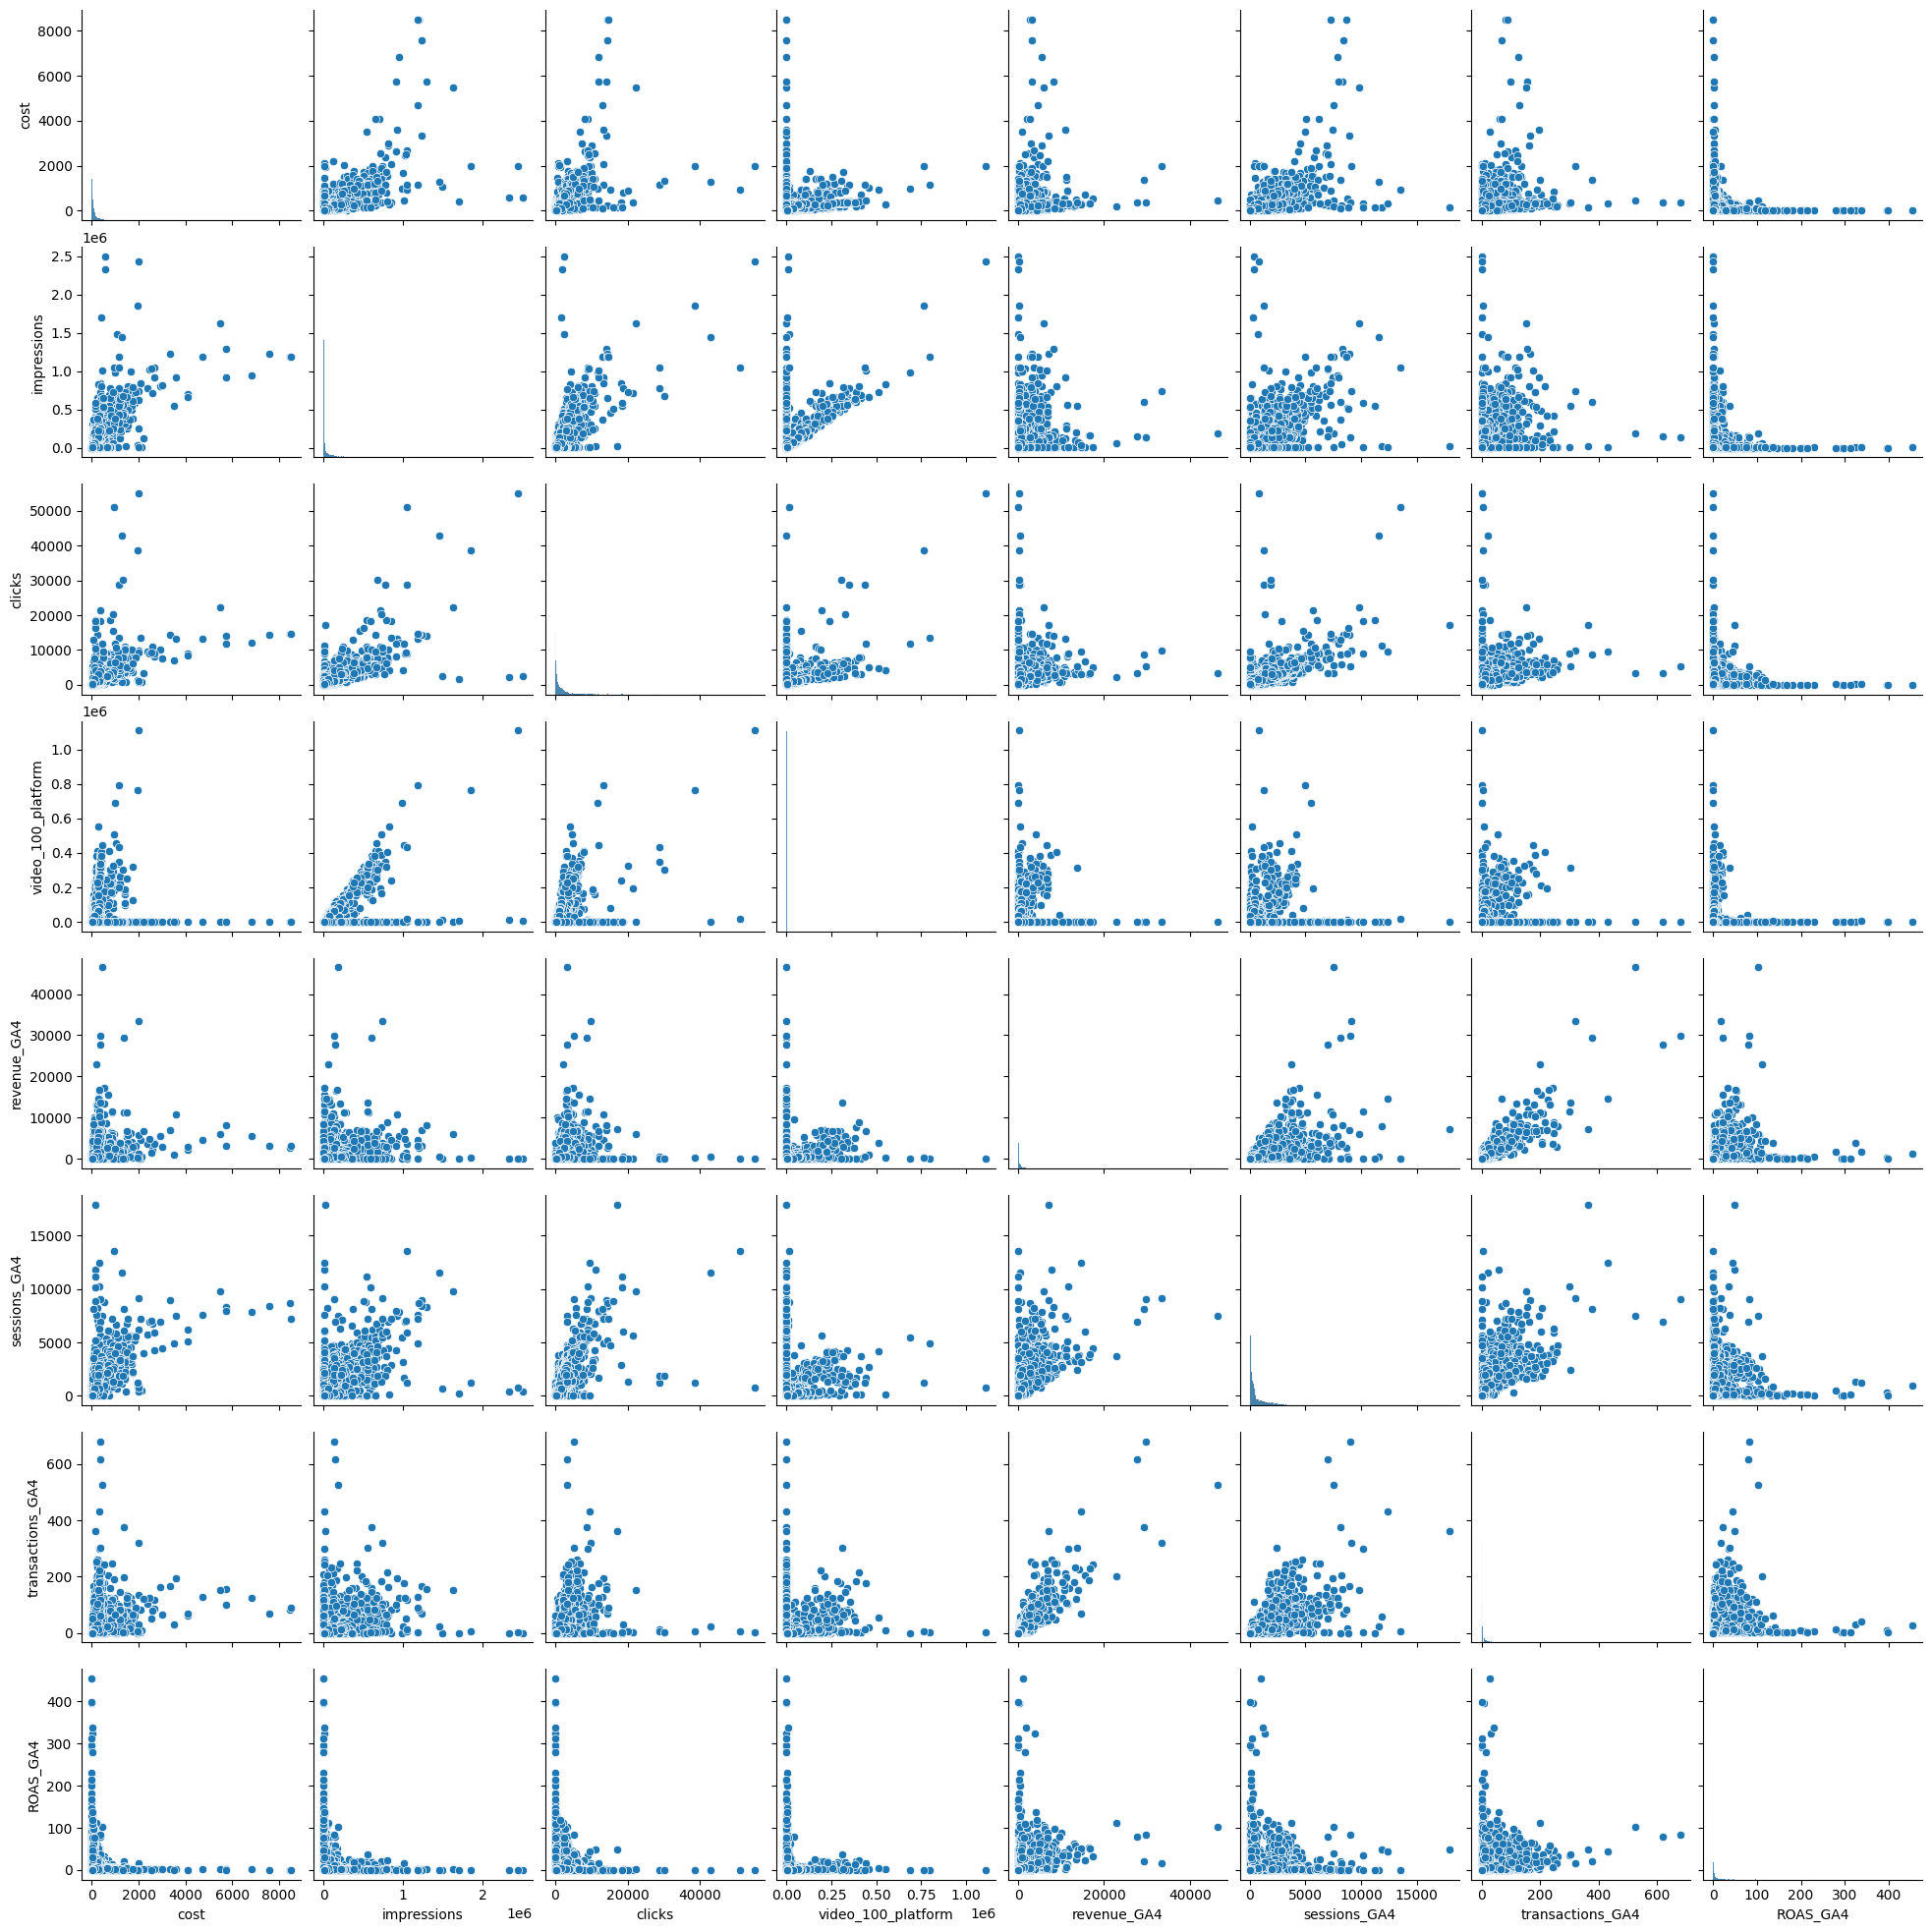

In [300]:
sns.pairplot(df_NonNull)

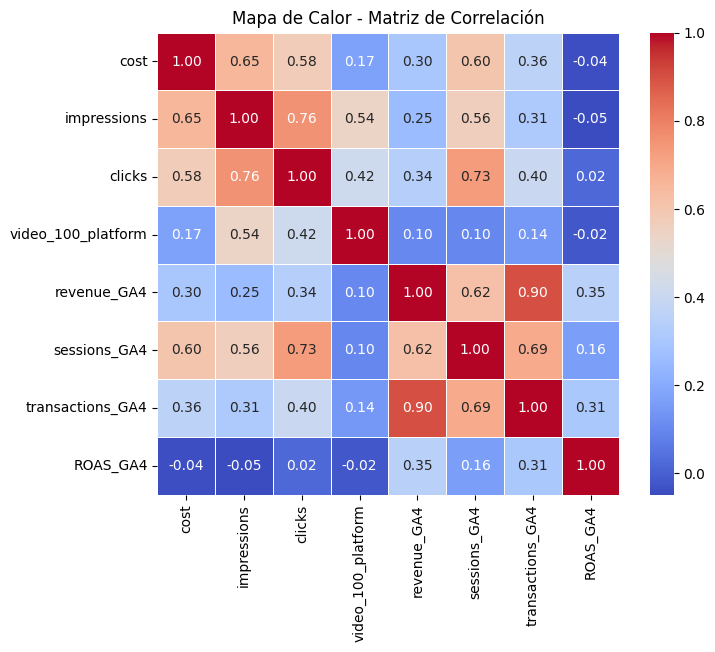

In [301]:
numeric_vars = df_NonNull.select_dtypes(include=['int64', 'float64'])
correlacion = numeric_vars.corr()
plt.figure(figsize=(8, 6))  # Establecer el tamaño del gráfico
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

### Resumen_2
-   En los boxplots se observan muchos datos atípicos, pero son consistentes con la naturaleza de las variables como costo, clics, etc.
    Sin embargo, al explorar más de cerca la variable objetivo, se detecta un dato atípico muy lejano. Tras un análisis detallado, se identifican 11 valores mayores a **500**, los cuales se consideran errores en los datos debido a que el costo asociado es casi o igual a cero. Estos valores representan menos del 0.12% de los datos y dado su origen dudoso o su extrema rareza, se eliminan del conjunto de datos.

-   Se eliminan las columnas 'Date' y 'full_campaign_name' ya que no aportan datos relevantes al modelo.

-   Al verificar los histogramas de las variables numéricas, se observa una concentración principal hacia el lado izquierdo, indicando que los valores más altos son menos  frecuentes.

-   Además, en los diagramas de dispersión y el mapa de calor de correlación se evidencian correlaciones leves positivas con la variable objetivo. Sin embargo, la variable que presenta la correlación más alta (revenue) está altamente correlacionada con las demás.

## Preparación de datos para entrenar modelos
**Codificación de variables categóricas**

Inicialmente, se convierten las variables categóricas resatantes en variables binarias mediante la codificación one-hot, lo que genera una columna por cada categoría en cada variable.

In [302]:
data_encoded = pd.get_dummies(df_NonNull, columns=['campaign', 'channel', 'session_source'])
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9247 entries, 0 to 13935
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cost                       9247 non-null   float64
 1   impressions                9247 non-null   int64  
 2   clicks                     9247 non-null   int64  
 3   video_100_platform         9247 non-null   float64
 4   revenue_GA4                9247 non-null   float64
 5   sessions_GA4               9247 non-null   float64
 6   transactions_GA4           9247 non-null   float64
 7   ROAS_GA4                   9247 non-null   float64
 8   campaign_Always On         9247 non-null   bool   
 9   campaign_Buenfin           9247 non-null   bool   
 10  campaign_E-Commerce        9247 non-null   bool   
 11  campaign_Hotsale           9247 non-null   bool   
 12  campaign_Liveshopping      9247 non-null   bool   
 13  channel_App                9247 non-null   bool   
 

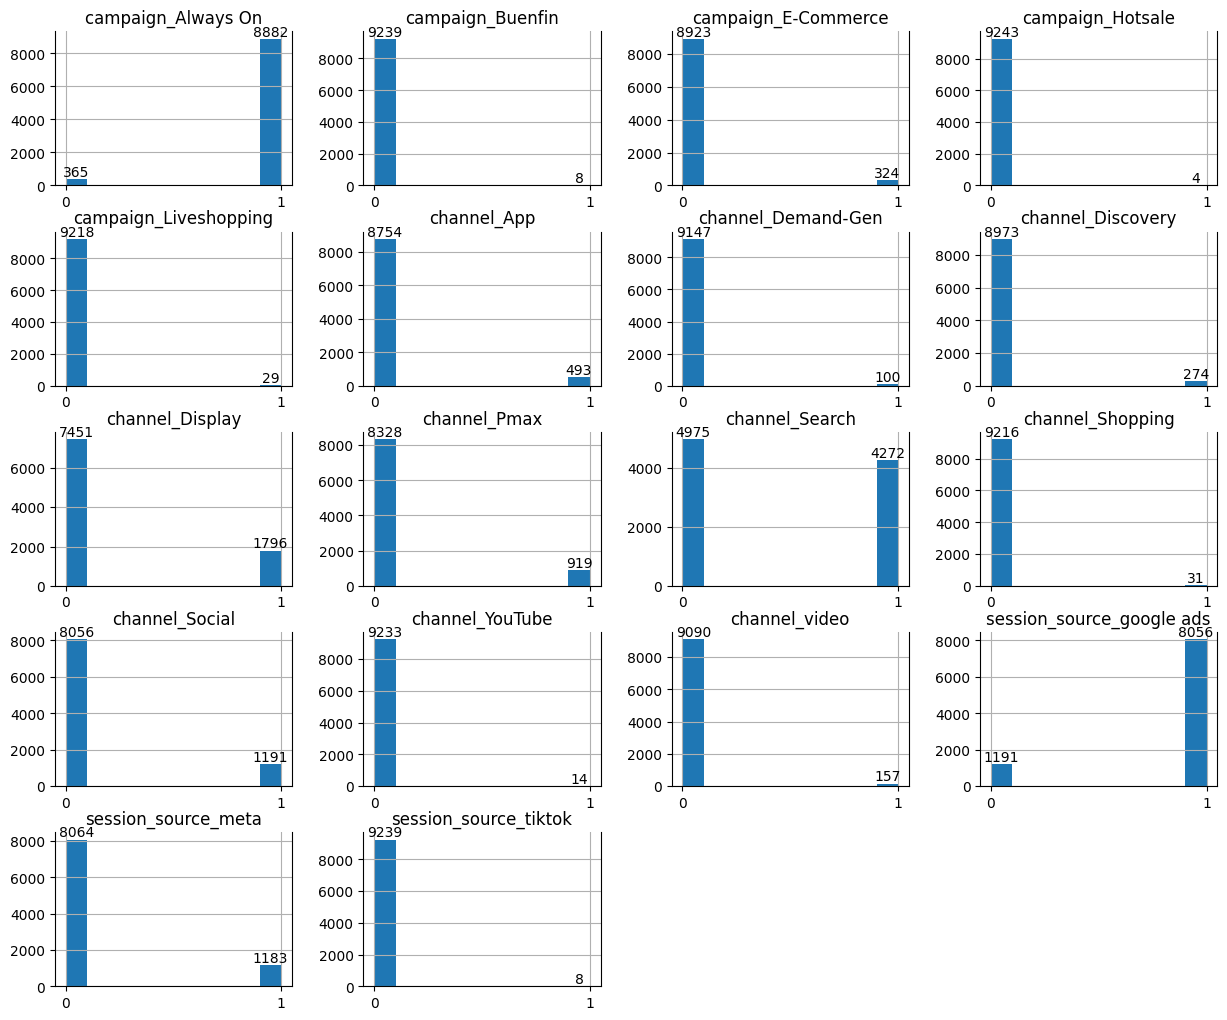

In [303]:
data_encoded_int = data_encoded.select_dtypes(include=['bool']).astype(int)
hist = data_encoded_int.hist(figsize=(15, 15), layout=(6, 4))

# Iterar sobre los histogramas y añadir etiquetas de datos
for ax in hist.flatten():
    for rect in ax.patches:
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        if y > 0:
            ax.text(x, y, f'{int(y)}', ha='center', va='bottom')
    # Eliminar el borde superior del cuadro que enmarca cada histograma
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 1])
plt.show()

### Resumen_3

Se exploran los tipos de datos y las nuevas columnas en el dataset resultante. En la actualidad, el dataset cuenta con 25 columnas, de las cuales 17 son de tipo booleano. Se observa la distribución de cada categoría.

## Generación de base de entrenamiento y testeo

Teniendo en cuenta que la variable "ROAS_GA4" es la variable objetivo, se procede a dividir los datos en características (X) y etiquetas (y), seguido de un proceso de escalado. Posteriormente, se lleva a cabo la separación de los datos en conjuntos de entrenamiento y prueba, con una relación de 80-20 respectivamente, para su análisis posterior.

In [304]:
y = data_encoded['ROAS_GA4']
X = data_encoded.drop('ROAS_GA4', axis=1)

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

### Estandarización

In [306]:
scalar = StandardScaler()
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns)

### Definición de modelos
Se crea un diccionario con los modelos clasicos de regresion

In [307]:
models = {
    "Ridge": Ridge(),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),
    "SGDRegressor": SGDRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "LinealRegression": LinearRegression()
}

## Entrenamiento y evaluación de modelos con validación cruzada

Se declara un pipeline con los pasos a seguir para cada modelo, que incluyen escalar los datos con StandardScaler(), imputar los valores nulos por la media y entrenar el modelo.

Posteriormente, se realiza una validación cruzada para todos los modelos con el fin de evaluar su rendimiento de manera más robusta y confiable. De esta validación se generan los resultados estadísticos R2 y se grafican los resultados de los modelos.

In [308]:
test_scores = {}
for model_name, model in models.items():
    reg_pipeline = Pipeline([
        ("scalar", StandardScaler()),
        ("numerical_imputer", SimpleImputer(strategy='mean')),
        ("model", model)])
    reg_pipeline.fit(X_train, y_train)
    y_pred = reg_pipeline.predict(X_test)
    score = cross_val_score(reg_pipeline, X_train, y_train, cv=5, scoring='r2').mean()
    test_scores[model_name] = r2_score(y_test, y_pred)
    print(f'{model_name}: R^2 en validación cruzada = {score:.4f}, R^2 en test = {test_scores[model_name]:.4f}')

Ridge: R^2 en validación cruzada = 0.1486, R^2 en test = 0.1828
BayesianRidge: R^2 en validación cruzada = 0.1502, R^2 en test = 0.1804
HuberRegressor: R^2 en validación cruzada = 0.1230, R^2 en test = 0.1479
SGDRegressor: R^2 en validación cruzada = -9.3980, R^2 en test = 0.1793
RandomForestRegressor: R^2 en validación cruzada = 0.8286, R^2 en test = 0.9217
LinealRegression: R^2 en validación cruzada = 0.1489, R^2 en test = 0.1834


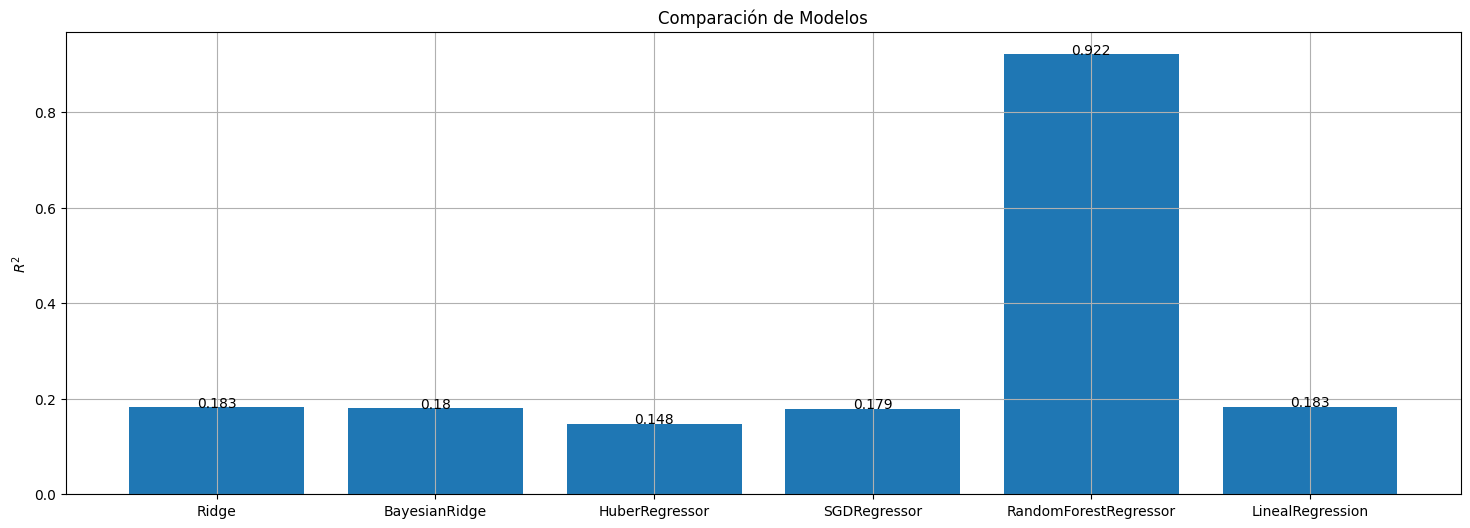

In [309]:
plt.figure(figsize=(18, 6))
bars = plt.bar(test_scores.keys(), test_scores.values())

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center')
plt.ylabel('$R^2$')
plt.title('Comparación de Modelos')
plt.grid()
plt.show()

## Conclusiones_1:
- Los modelos "LinearRegression", "SGDRegressor" y la Regularización "Ridge" dan resultados casi idénticos.
- El modelo que mostró los mejores resultados fue "RandomForestRegressor".
- Se logró un R2 máximo de 0.91 al reentrenar varias veces el modelo y 0.83 con una validación cruzada de 5.
- Al realizar la validación cruzada, se observa que el modelo "RandomForestRegressor" tiene un R2 medio más bajo. Esto podría deberse a la falta de optimización de hiperparámetros y a la sensibilidad del modelo a la calidad y cantidad de datos de entrenamiento, en comparación con otros modelos. Sin embargo, se registra una desviación estándar menor que la de otros modelos.
- El modelo con el resultado más bajo es "HubberRegressor".

# Categorizar la variable objetivo

Se crea una nueva variable llamada **ROAS_Cat** con la condición: (si ROAS_GA4 es mayor o igual a 35 (mean) entonces el retorno es bueno, en otro caso diremos que tiene retorno bajo). 
Esta nueva variable será la variable objetivo de nuestra regresión logística.

In [310]:
data_encoded2=data_encoded
data_encoded2['ROAS_Cat'] = 'Bajo'
data_encoded2.loc[data_encoded2['ROAS_GA4'] >= 35, 'ROAS_Cat'] = 'Bueno'

In [311]:
data_encoded2.drop('ROAS_GA4', axis=1, inplace=True)

## Generación de base de entrenamiento y testeo

Teniendo en cuenta que la variable "ROAS_Cat" es la variable objetivo, se procede a dividir los datos en características (X) y etiquetas (y), seguido de un proceso de escalado. Posteriormente, se lleva a cabo la separación de los datos en conjuntos de entrenamiento y prueba, con una relación de 80-20 respectivamente, para su análisis posterior.

In [312]:
y = data_encoded2['ROAS_Cat']
X = data_encoded2.drop('ROAS_Cat', axis=1)

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

### Estandarización

In [314]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), index=X_test.index, columns=X_test.columns)

## Entrenamiento del modelo de regresión logistica

La creación del modelo es seguida por una comparación entre la porción de entrenamiento y prueba. Se calculan estadísticas, se genera una matriz de confusión y se representa la curva ROC.

In [315]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [316]:
y_pred = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logistic)
print(classification_report(y_test, y_pred))

Accuracy: 0.9843243243243244
              precision    recall  f1-score   support

        Bajo       0.99      1.00      0.99      1809
       Bueno       0.88      0.34      0.49        41

    accuracy                           0.98      1850
   macro avg       0.93      0.67      0.74      1850
weighted avg       0.98      0.98      0.98      1850



### Matriz de Confusión

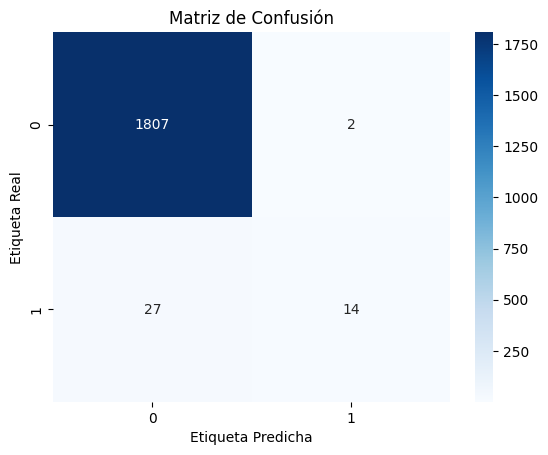

In [317]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

### Curva ROC-AUC

Inicialmente se Convertir las etiquetas de clase a valores numéricos, luego se calcula y grafican los estadisticos ROC-AUC

In [318]:

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred = logistic_model.predict(X_test)

AUC: 0.9843870080491849


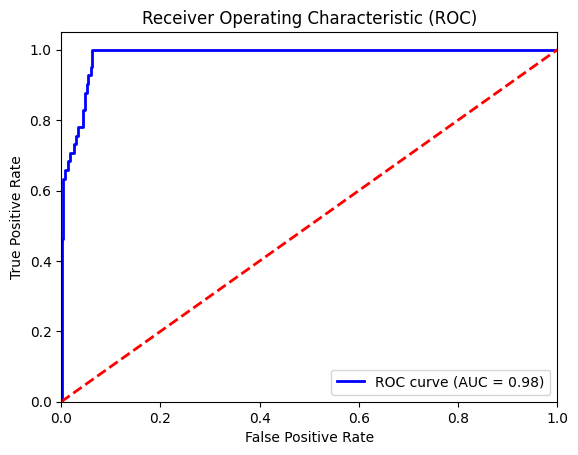

In [319]:
y_probs = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test_encoded, y_probs)
print("AUC:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Conclusiones_2
- Se observa que el modelo de "LogisticRegression" proporciona resultados significativamente superiores a los modelos de regresión, con una precisión (Accuracy) de 0.98.
- La categorización de la variable objetivo ha demostrado que el modelo de "LogisticRegression" es considerablemente más eficiente. Esto no solo mejora la precisión, sino que también habilita la creación de modelos predictivos más sólidos y confiables.
- La efectividad del modelo también se evidencia en la curva ROC, donde el AUC es de 0.98, indicando que la curva se aleja significativamente de la línea diagonal. Además, en la matriz de confusión, observamos una gran cantidad de verdaderos positivos y verdaderos negativos, lo que confirma la eficacia del modelo.
